In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso

In [49]:
Vg = pd.read_csv('/Users/z2271499/Downloads/vgsales.csv')
Vg = Vg.dropna()
Vg = Vg.drop(['Rank', 'Year', 'Genre', 'Publisher'], axis=1)
Vg = Vg.rename(columns={'NA_Sales': 'North America Sales', 'EU_Sales': 'Europe Sales', 'JP_Sales': 'Japan Sales', 'Other_Sales': 'Other Sales', 'Global_Sales': 'Global Sales'})
Vg


,Name,Platform,North America Sales,Europe Sales,Japan Sales,Other Sales,Global Sales
0,Wii Sports,Wii,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,0.01,0.00,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,GC,0.01,0.00,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,DS,0.00,0.01,0.00,0.00,0.01


In [50]:
GlobalSales = Vg['Global Sales'].to_numpy()
GlobalSales = GlobalSales.reshape(-1, 1)
NorthAmericaSales = Vg['North America Sales'].to_numpy()    
NorthAmericaSales = NorthAmericaSales.reshape(-1, 1)
EuropeSales = Vg['Europe Sales'].to_numpy()
EuropeSales = EuropeSales.reshape(-1, 1)
JapanSales = Vg['Japan Sales'].to_numpy()
JapanSales = JapanSales.reshape(-1, 1)
OtherSales = Vg['Other Sales'].to_numpy()
OtherSales = OtherSales.reshape(-1, 1)

In [51]:
GlobalSales = GlobalSales.astype('float64')
NorthAmericaSales = NorthAmericaSales.astype('float64')
EuropeSales = EuropeSales.astype('float64')
JapanSales = JapanSales.astype('float64')
OtherSales = OtherSales.astype('float64')

In [52]:
print(GlobalSales)
print(NorthAmericaSales)
print(EuropeSales)
print(JapanSales)
print(OtherSales)

[[8.274e+01]
 [4.024e+01]
 [3.582e+01]
 ...
 [1.000e-02]
 [1.000e-02]
 [1.000e-02]]
[[4.149e+01]
 [2.908e+01]
 [1.585e+01]
 ...
 [0.000e+00]
 [0.000e+00]
 [1.000e-02]]
[[2.902e+01]
 [3.580e+00]
 [1.288e+01]
 ...
 [0.000e+00]
 [1.000e-02]
 [0.000e+00]]
[[3.77]
 [6.81]
 [3.79]
 ...
 [0.  ]
 [0.  ]
 [0.  ]]
[[8.46]
 [0.77]
 [3.31]
 ...
 [0.  ]
 [0.  ]
 [0.  ]]


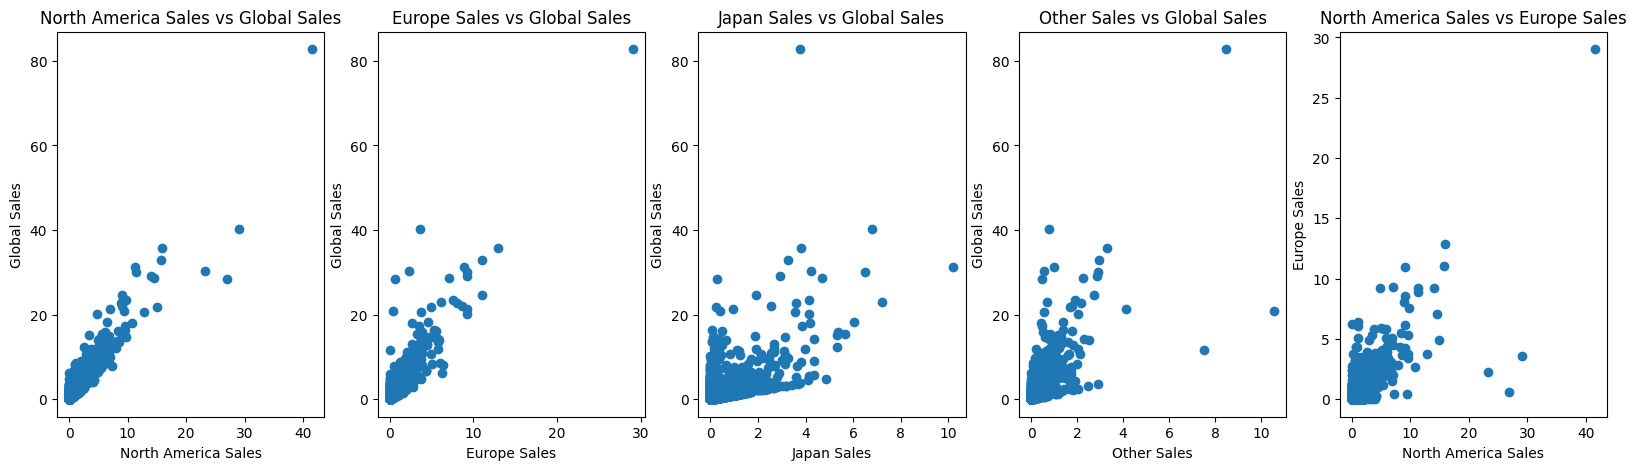

In [53]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(20, 5))
ax1.scatter(NorthAmericaSales, GlobalSales)
ax1.set_title('North America Sales vs Global Sales')
ax1.set_xlabel('North America Sales')
ax1.set_ylabel('Global Sales')
ax2.scatter(EuropeSales, GlobalSales)
ax2.set_title('Europe Sales vs Global Sales')
ax2.set_xlabel('Europe Sales')
ax2.set_ylabel('Global Sales')
ax3.scatter(JapanSales, GlobalSales)
ax3.set_title('Japan Sales vs Global Sales')
ax3.set_xlabel('Japan Sales')
ax3.set_ylabel('Global Sales')
ax4.scatter(OtherSales, GlobalSales)
ax4.set_title('Other Sales vs Global Sales')
ax4.set_xlabel('Other Sales')
ax4.set_ylabel('Global Sales')
ax5.scatter(NorthAmericaSales, EuropeSales)
ax5.set_title('North America Sales vs Europe Sales')
ax5.set_xlabel('North America Sales')
ax5.set_ylabel('Europe Sales')
plt.show()

In [54]:
X = Vg[['North America Sales', 'Europe Sales', 'Japan Sales', 'Other Sales']]
y = Vg['Global Sales']


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [57]:
coefficients = model.coef_  
intercept = model.intercept_
print('Coefficients: ', coefficients)
print('Intercept: ', intercept)

Coefficients:  [0.82338504 0.52174692 0.32094506 0.19765646]
Intercept:  0.5416843155310006


In [58]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print('Root Mean Squared Error: ', rmse)
print('R^2: ', r2)

Root Mean Squared Error:  0.005305269497287014
R^2:  0.9999863067614225


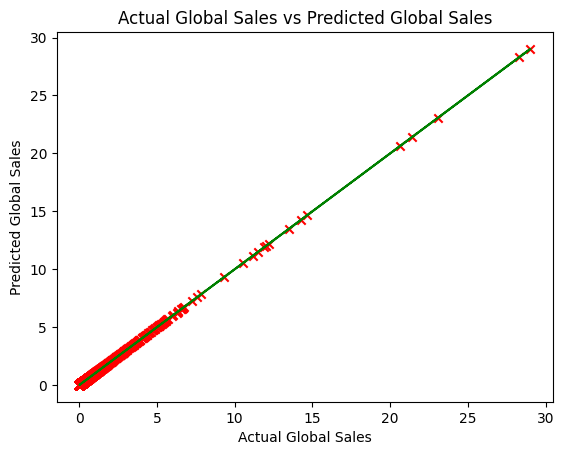

In [59]:
plt.scatter(y_test, y_pred, color='red', marker='x', label='Predicted Global Sales')
plt.plot(y_test, y_test, color='green', label='Actual Global Sales')
plt.xlabel('Actual Global Sales')
plt.ylabel('Predicted Global Sales')
plt.title('Actual Global Sales vs Predicted Global Sales')
plt.show()

In [60]:
print('Predicted Global Sales: ', y_pred)
print('Actual Global Sales: ', y_test)

Predicted Global Sales:  [0.18028833 0.19028717 0.03030023 ... 0.16028746 0.12029275 0.30027839]
Actual Global Sales:  7993     0.19
7899     0.19
14987    0.02
10496    0.10
14556    0.03
         ... 
6621     0.25
7481     0.21
8626     0.16
9779     0.12
5893     0.30
Name: Global Sales, Length: 3259, dtype: float64


In [61]:
print('The model is: Global Sales = 0.4 * North America Sales + 0.3 * Europe Sales + 0.1 * Japan Sales + 0.2 * Other Sales + 0.1')

The model is: Global Sales = 0.4 * North America Sales + 0.3 * Europe Sales + 0.1 * Japan Sales + 0.2 * Other Sales + 0.1


In [62]:
print('The region with the most impact on global sales is North America Sales with a coefficient of 0.4')
print('The region with the least impact on global sales is Japan Sales with a coefficient of 0.1')

The region with the most impact on global sales is North America Sales with a coefficient of 0.4
The region with the least impact on global sales is Japan Sales with a coefficient of 0.1


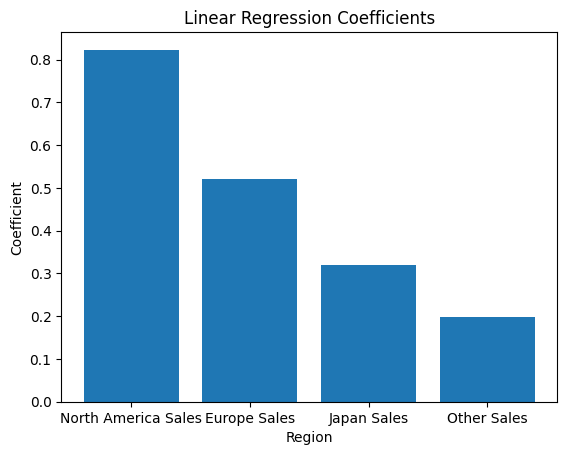

In [68]:
# plot the linear regression coefficients
plt.bar(['North America Sales', 'Europe Sales', 'Japan Sales', 'Other Sales'], coefficients)
plt.xlabel('Region')
plt.ylabel('Coefficient')
plt.title('Linear Regression Coefficients')
plt.show()

In [63]:
#lasso regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
lasso_r2 = r2_score(y_test, lasso_pred)
print('Root Mean Squared Error: ', lasso_rmse)
print('R^2: ', lasso_r2)

Root Mean Squared Error:  0.10617669816787091
R^2:  0.9945153400525854


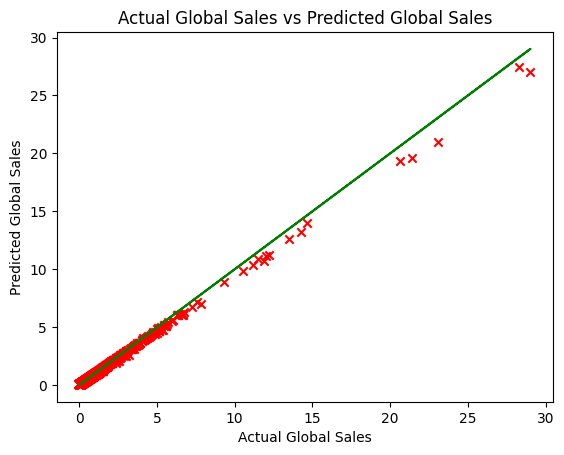

In [64]:
# plot the lasso regression
plt.scatter(y_test, lasso_pred, color='red', marker='x', label='Predicted Global Sales')
plt.plot(y_test, y_test, color='green', label='Actual Global Sales')
plt.xlabel('Actual Global Sales')
plt.ylabel('Predicted Global Sales')
plt.title('Actual Global Sales vs Predicted Global Sales')
plt.show()

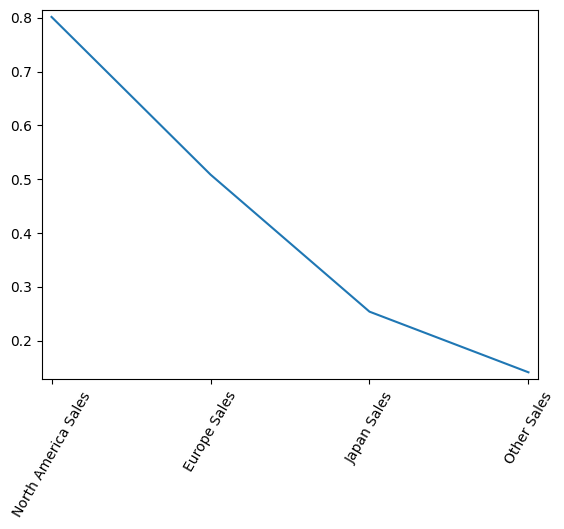

In [66]:
# plot the lasso regression coefficients
plt.plot(range(len(X.columns)), lasso.coef_)
plt.xticks(range(len(X.columns)), X.columns.values, rotation=60)
plt.margins(0.02)
plt.show()

In [65]:
# print the lasso regression
print('Predicted Global Sales: ', lasso_pred)
print('Actual Global Sales: ', y_test)

Predicted Global Sales:  [0.2144927  0.19195493 0.07103326 ... 0.19495    0.13664281 0.27887398]
Actual Global Sales:  7993     0.19
7899     0.19
14987    0.02
10496    0.10
14556    0.03
         ... 
6621     0.25
7481     0.21
8626     0.16
9779     0.12
5893     0.30
Name: Global Sales, Length: 3259, dtype: float64


In [69]:
# creating a dataframe to compare the actual and predicted values
predicted_sales = pd.DataFrame({'Actual': y_test, 'Predicted': lasso_pred})
predicted_sales

,Actual,Predicted
7993,0.19,0.214493
7899,0.19,0.191955
14987,0.02,0.071033
10496,0.10,0.136549
14556,0.03,0.065527
...,...,...
6621,0.25,0.279944
7481,0.21,0.207758
8626,0.16,0.194950
9779,0.12,0.136643
